In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
# import modin.pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

In [2]:
train = pd.read_csv('sales_train_v1.csv')
if 'Unnamed: 0' in train.columns:
    train.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
def graph_insight(data):
    print(set(data.dtypes.tolist()))
    df_num = data.select_dtypes(include = ['float64', 'int64'])
    df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);

{dtype('O'), dtype('float64'), dtype('int64')}


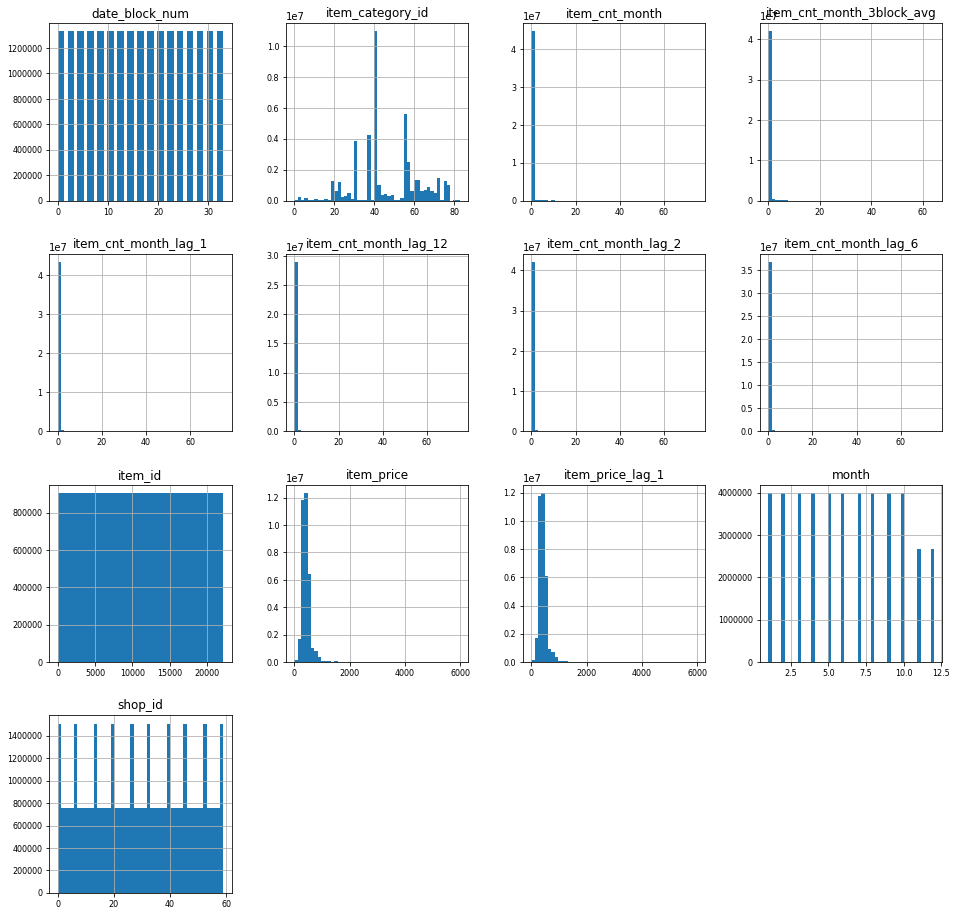

In [4]:
graph_insight(train)

In [6]:
def eda(data):
    print("----------Top-5- Record----------")
    print(data.head(5))
    print("-----------Information-----------")
    print(data.info())
    print("-----------Data Types-----------")
    print(data.dtypes)
    print("----------Missing value-----------")
    print(data.isnull().sum())
    print("----------Null value-----------")
    print(data.isna().sum())
    print("----------Shape of Data----------")
    print(data.shape)

In [7]:
eda(train)

----------Top-5- Record----------
   date_block_num  shop_id  item_id  item_price  month  item_cnt_month  \
0               0        0       32       221.0    1.0             6.0   
1               0        0       33       347.0    1.0             3.0   
2               0        0       35       247.0    1.0             1.0   
3               0        0       43       221.0    1.0             1.0   
4               0        0       51       128.5    1.0             2.0   

   item_category_id  item_cnt_month_lag_1  item_cnt_month_lag_2  \
0                40                   NaN                   NaN   
1                37                   NaN                   NaN   
2                40                   NaN                   NaN   
3                40                   NaN                   NaN   
4                57                   NaN                   NaN   

   item_cnt_month_lag_6  item_cnt_month_lag_12  item_cnt_month_3block_avg  \
0                   NaN                  

In [13]:
vis_df = train[(train['item_cnt_month_3block_avg'] != 0) & (train['item_cnt_month_lag_12'] != 0)]

In [14]:
vis_df.shape

(4158965, 15)

In [15]:
vis_df.head()

,date_block_num,shop_id,item_id,item_price,month,item_cnt_month,item_category_id,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_6,item_cnt_month_lag_12,item_cnt_month_3block_avg,item_price_lag_1,item_category,shop_category
0,0,0,32,221.0,1.0,6.0,40,NaN,NaN,NaN,NaN,NaN,NaN,Кино,!Якутск
1,0,0,33,347.0,1.0,3.0,37,NaN,NaN,NaN,NaN,NaN,NaN,Кино,!Якутск
2,0,0,35,247.0,1.0,1.0,40,NaN,NaN,NaN,NaN,NaN,NaN,Кино,!Якутск
3,0,0,43,221.0,1.0,1.0,40,NaN,NaN,NaN,NaN,NaN,NaN,Кино,!Якутск
4,0,0,51,128.5,1.0,2.0,57,NaN,NaN,NaN,NaN,NaN,NaN,Музыка,!Якутск


In [54]:
shop =  train.groupby(by=['item_id']).agg('sum')['item_cnt_month']
shop = shop.reset_index()

In [55]:
shop_df = shop.sort_values(by=['item_cnt_month'], ascending=False)

In [56]:
shop_df.head()

,item_id,item_cnt_month
20949,20949,42539.0
5822,5822,13484.0
17717,17717,13422.0
2808,2808,8789.0
4181,4181,8701.0


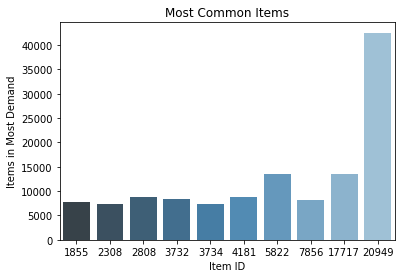

In [60]:
p = sns.barplot(x = 'item_id', y = 'item_cnt_month', data = shop_df.head(10), palette="Blues_d")
p.set_title("Most Common Items")
p.set(xlabel='Item ID', ylabel='Items in Most Demand')
plt.savefig('Most Common Items.pdf')
plt.show()

In [ ]:
block_cnt =  train.groupby(by=['date_block_num']).agg('sum')['item_cnt_month']
block_cnt = block_cnt.reset_index()

In [ ]:
block_cnt.head()

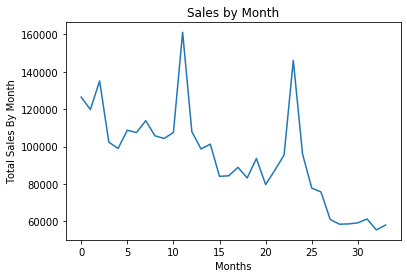

In [63]:
p = sns.lineplot(x = 'date_block_num', y = 'item_cnt_month', data = block_cnt)
p.set_title("Sales by Month")
p.set(xlabel='Months', ylabel='Total Sales By Month')
plt.savefig('Sales by Month.pdf')
plt.show()

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

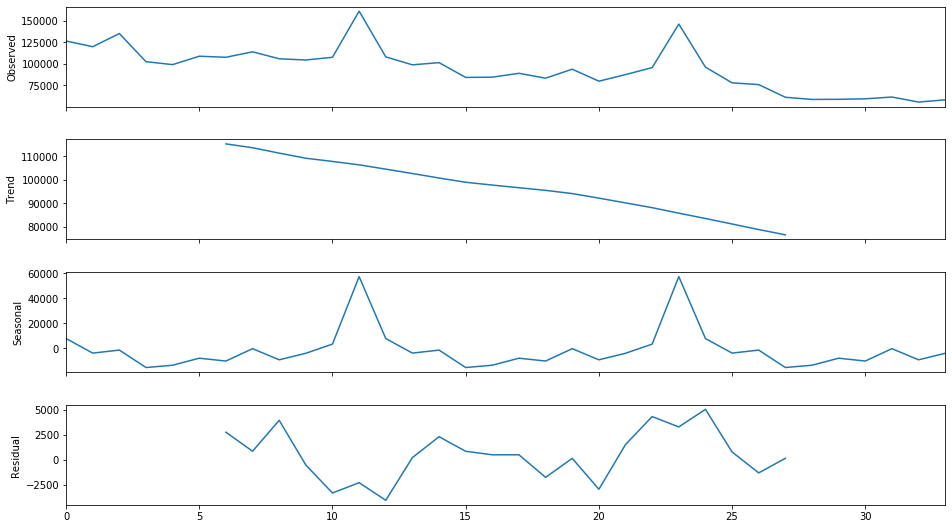

In [77]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(block_cnt.item_cnt_month,freq=12)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.savefig('Seasonality and Trends.pdf')
plt.show()

In [69]:
item =  train.groupby(by=['shop_id']).agg('sum')['item_cnt_month']
item =  item.reset_index()
item = item.sort_values(by=['item_cnt_month'], ascending=False)
item.head()

,shop_id,item_cnt_month
31,31,264207.0
25,25,206534.0
54,54,160508.0
28,28,160124.0
57,57,129717.0


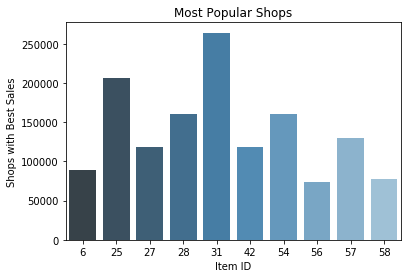

In [70]:
p = sns.barplot(x = 'shop_id', y = 'item_cnt_month', data = item.head(10), palette="Blues_d")
p.set_title("Most Popular Shops")
p.set(xlabel='Item ID', ylabel='Shops with Best Sales')
plt.savefig('Biggest Shops.pdf')
plt.show()

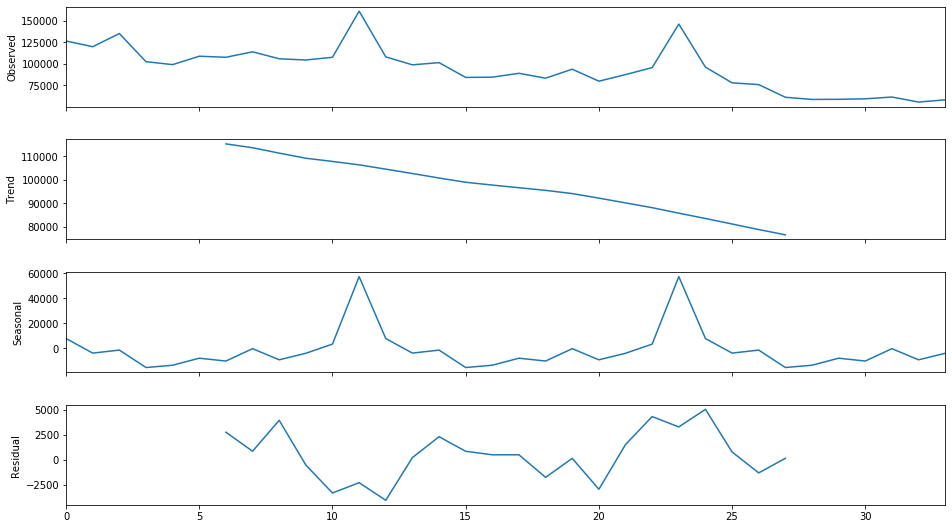

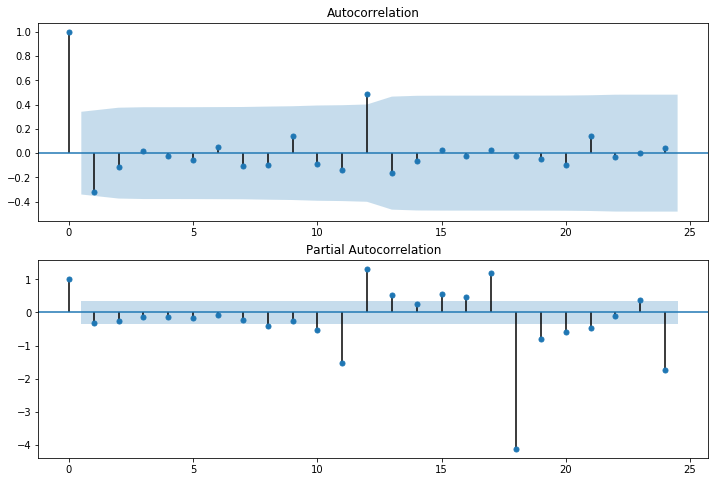

In [74]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(block_cnt.item_cnt_month,freq=12)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.savefig('Seasonality and Trends.pdf')
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(block_cnt['item_cnt_month'].diff().dropna(), lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(block_cnt['item_cnt_month'].diff().dropna(), lags=24, ax=ax2)
plt.show()